In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('breast_data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [7]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis'>

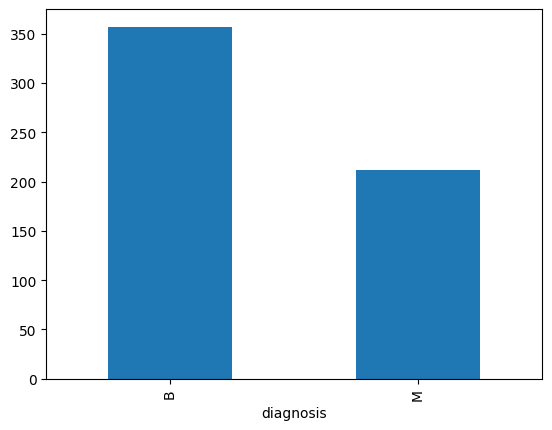

In [8]:
df['diagnosis'].value_counts().plot(kind='bar')

In [9]:
df['diagnosis'] = df['diagnosis'].apply(lambda value : 1 if value=='M' else 0)
df.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
376,0,10.57,20.22,70.15,338.3,0.09073,0.16600,0.228000,0.059410,0.2188,...,10.85,22.82,76.51,351.9,0.11430,0.36190,0.60300,0.14650,0.2597,0.12000
397,0,12.80,17.46,83.05,508.3,0.08044,0.08895,0.073900,0.040830,0.1574,...,13.74,21.06,90.72,591.0,0.09534,0.18120,0.19010,0.08296,0.1988,0.07053
386,0,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,0.1646,...,13.13,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
29,1,17.57,15.05,115.00,955.1,0.09847,0.11570,0.098750,0.079530,0.1739,...,20.01,19.52,134.90,1227.0,0.12550,0.28120,0.24890,0.14560,0.2756,0.07919
302,1,20.09,23.86,134.70,1247.0,0.10800,0.18380,0.228300,0.128000,0.2249,...,23.68,29.43,158.80,1696.0,0.13470,0.33910,0.49320,0.19230,0.3294,0.09469
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.88,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
125,0,13.85,17.21,88.44,588.7,0.08785,0.06136,0.014200,0.011410,0.1614,...,15.49,23.58,100.30,725.9,0.11570,0.13500,0.08115,0.05104,0.2364,0.07182
286,0,11.94,20.76,77.87,441.0,0.08605,0.10110,0.065740,0.037910,0.1588,...,13.24,27.29,92.20,546.1,0.11160,0.28130,0.23650,0.11550,0.2465,0.09981
315,0,12.49,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,...,13.34,19.71,84.48,544.2,0.11040,0.04953,0.01938,0.02784,0.1917,0.06174
406,0,16.14,14.86,104.30,800.0,0.09495,0.08501,0.055000,0.045280,0.1735,...,17.71,19.58,115.90,947.9,0.12060,0.17220,0.23100,0.11290,0.2778,0.07012


In [10]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [12]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=.20)

In [13]:
## Scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(X_test)

## Build Model

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

y_pred = lg.predict(x_test)
accuracy_score(y_test , y_pred)

0.9912280701754386

-----

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
accuracy_score(y_test , y_pred)

0.9824561403508771

-----

In [17]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train,y_train)

y_pred = sv.predict(x_test)
accuracy_score(y_test , y_pred)

0.9736842105263158

-------

In [18]:
from sklearn.ensemble import VotingClassifier

In [19]:
classifiers = [('Logistic' , lg) , ('KNN' , knn) , ('SVC' , sv)]

vc = VotingClassifier(estimators=classifiers)
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('Logistic', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()), ('SVC', SVC())])

In [20]:

y_pred = vc.predict(x_test)
accuracy_score(y_test , y_pred)

0.9824561403508771